<a href="https://colab.research.google.com/github/jagathcharan/circle-detection/blob/main/yolo_circle_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Conecting the drive

In [ ]:
#connecting my drive to save the synthetic data set
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
output_dir = "/content/drive/My Drive/circle_dataset"
os.makedirs(output_dir, exist_ok=True)
images_dir = os.path.join(output_dir, "images")
labels_dir = os.path.join(output_dir, "labels")
os.makedirs(images_dir, exist_ok=True)
os.makedirs(labels_dir, exist_ok=True)


#Synthetic DataSet Generation

In [ ]:
import cv2
import numpy as np
import random
import shutil

In [ ]:
num_images = 1500  # Total number of images in the dataset
img_size = (416, 416)

In [ ]:
# Background creations functions
def create_solid_color_background(img_size):
    color = tuple(map(int, np.random.randint(0, 256, size=3).tolist()))
    return np.full((*img_size, 3), color, dtype=np.uint8)

def create_gradient_background(img_size):
    x = np.linspace(0, 255, img_size[1])
    y = np.linspace(0, 255, img_size[0])
    gradient = np.outer(y, x)
    return cv2.merge([gradient, gradient, gradient])

def create_noise_background(img_size):
    noise = np.random.randint(0, 256, (*img_size, 3), dtype=np.uint8)
    return noise

def create_pattern_background(img_size, pattern_type='stripes'):
    background = np.zeros((*img_size, 3), dtype=np.uint8)
    if pattern_type == 'stripes':
        for i in range(0, img_size[0], 10):
            color = tuple(map(int, np.random.randint(0, 256, size=3).tolist()))
            background[i:i+5, :] = color
    return background

In [ ]:
# Generate images with and without circles
for i in range(num_images):
    # Randomly select a background type
    background_choice = random.choice(['solid', 'gradient', 'noise', 'pattern'])

    if background_choice == 'solid':
        background = create_solid_color_background(img_size)
    elif background_choice == 'gradient':
        background = create_gradient_background(img_size)
    elif background_choice == 'noise':
        background = create_noise_background(img_size)
    else:
        background = create_pattern_background(img_size)

    # Randomly decide whether to include circles
    include_circles = random.choice([True, False])
    annotation = []
    if include_circles:
        num_circles = np.random.randint(1, 6)

        for _ in range(num_circles):
            radius = np.random.randint(10, 50)
            color = tuple(map(int, np.random.randint(0, 256, size=3).tolist()))
            center = tuple(np.random.randint(radius, min(img_size) - radius, size=2))
            cv2.circle(background, center, radius, color, -1)

            # YOLO annotation format: class x_center y_center width height
            x_center = center[0] / img_size[0]
            y_center = center[1] / img_size[1]
            width = height = 2 * radius / img_size[0]
            annotation.append(f"0 {x_center} {y_center} {width} {height}\n")

    # Save the image
    image_path = os.path.join(images_dir, f"image_{i}.png")
    cv2.imwrite(image_path, background)

    # Save the annotation only if circles are present
    if annotation:
        label_path = os.path.join(labels_dir, f"image_{i}.txt")
        with open(label_path, 'w') as f:
            f.writelines(annotation)


In [ ]:
# Paths to the images and labels directories
images_dir = "/content/drive/My Drive/circle_dataset/images"
labels_dir = "/content/drive/My Drive/circle_dataset/labels"

# List the files in the images directory and count them
image_files = os.listdir(images_dir)
num_images = len(image_files)
print(f"Images Directory Contents ({num_images} files):")
print(image_files)

# List the files in the labels directory and count them
label_files = os.listdir(labels_dir)
num_labels = len(label_files)
print(f"\nLabels Directory Contents ({num_labels} files):")
print(label_files)


Images Directory Contents (1500 files):
['image_0.png', 'image_1.png', 'image_2.png', 'image_3.png', 'image_4.png', 'image_5.png', 'image_6.png', 'image_7.png', 'image_8.png', 'image_9.png', 'image_10.png', 'image_11.png', 'image_12.png', 'image_13.png', 'image_14.png', 'image_15.png', 'image_16.png', 'image_17.png', 'image_18.png', 'image_19.png', 'image_20.png', 'image_21.png', 'image_22.png', 'image_23.png', 'image_24.png', 'image_25.png', 'image_26.png', 'image_27.png', 'image_28.png', 'image_29.png', 'image_30.png', 'image_31.png', 'image_32.png', 'image_33.png', 'image_34.png', 'image_35.png', 'image_36.png', 'image_37.png', 'image_38.png', 'image_39.png', 'image_40.png', 'image_41.png', 'image_42.png', 'image_43.png', 'image_44.png', 'image_45.png', 'image_46.png', 'image_47.png', 'image_48.png', 'image_49.png', 'image_50.png', 'image_51.png', 'image_52.png', 'image_53.png', 'image_54.png', 'image_55.png', 'image_56.png', 'image_57.png', 'image_58.png', 'image_59.png', 'image_60

In [ ]:
#counting and verifing
images_dir = "/content/drive/My Drive/circle_dataset/images"
labels_dir = "/content/drive/My Drive/circle_dataset/labels"

# List all image files
image_files = os.listdir(images_dir)

# Count images without corresponding label files
no_circle_count = 0

for image_file in image_files:
    # Construct the corresponding label file name
    label_file = os.path.splitext(image_file)[0] + ".txt"

    # Check if the label file exists
    if not os.path.exists(os.path.join(labels_dir, label_file)):
        no_circle_count += 1

# Print the result
print(f"Number of images without circles: {no_circle_count}")


Number of images without circles: 732


#Preprocessing

In [ ]:
# Get a list of all images in the image directory
image_files = [f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Loop through each image file
for image_file in image_files:
    # Create the corresponding text file name
    txt_file = os.path.splitext(image_file)[0] + '.txt'

    # Check if the text file exists in the labels directory
    if not os.path.exists(os.path.join(labels_dir, txt_file)):
        # If the text file does not exist, create an empty one
        open(os.path.join(labels_dir, txt_file), 'w').close()
        print(f"Created empty annotation file: {txt_file}")

print("Processing complete.")


Created empty annotation file: image_0.txt
Created empty annotation file: image_1.txt
Created empty annotation file: image_2.txt
Created empty annotation file: image_6.txt
Created empty annotation file: image_7.txt
Created empty annotation file: image_10.txt
Created empty annotation file: image_15.txt
Created empty annotation file: image_19.txt
Created empty annotation file: image_21.txt
Created empty annotation file: image_24.txt
Created empty annotation file: image_27.txt
Created empty annotation file: image_29.txt
Created empty annotation file: image_33.txt
Created empty annotation file: image_38.txt
Created empty annotation file: image_40.txt
Created empty annotation file: image_41.txt
Created empty annotation file: image_42.txt
Created empty annotation file: image_44.txt
Created empty annotation file: image_45.txt
Created empty annotation file: image_46.txt
Created empty annotation file: image_47.txt
Created empty annotation file: image_49.txt
Created empty annotation file: image_

In [ ]:
# Get the list of all files in the image and labels directories
image_files = [f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
label_files = [f for f in os.listdir(labels_dir) if f.endswith('.txt')]

# Count the number of files in each directory
num_images = len(image_files)
num_labels = len(label_files)

# Print the number of files
print(f"Number of image files: {num_images}")
print(f"Number of label files: {num_labels}")

Number of image files: 1500
Number of label files: 1500


In [ ]:
#spliting the data into test,train and validation
import os
import shutil
import random
from math import floor

def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

# Set the random seed for reproducibility
random.seed(42)

# Paths
base_dir = '/content/drive/My Drive/circle_dataset'  # Base directory containing images and labels folders
images_dir = os.path.join(base_dir, 'images')
labels_dir = os.path.join(base_dir, 'labels')
splits_dir = os.path.join(base_dir, 'splits')

# Define split ratios
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

# Get list of all image files
image_extensions = ('.jpg', '.jpeg', '.png')
all_images = [f for f in os.listdir(images_dir) if f.lower().endswith(image_extensions)]

# Filter out images without corresponding label files
image_label_pairs = []
for img_file in all_images:
    label_file = os.path.splitext(img_file)[0] + '.txt'
    if os.path.exists(os.path.join(labels_dir, label_file)):
        image_label_pairs.append((img_file, label_file))
    else:
        print(f"Warning: Label file for {img_file} not found. Skipping this image.")

total_images = len(image_label_pairs)
print(f"Total images with labels: {total_images}")

# Shuffle the data
random.shuffle(image_label_pairs)

# Calculate split indices
train_end = floor(total_images * train_ratio)
val_end = train_end + floor(total_images * val_ratio)

# Split the data
train_data = image_label_pairs[:train_end]
val_data = image_label_pairs[train_end:val_end]
test_data = image_label_pairs[val_end:]

splits = {'train': train_data, 'val': val_data, 'test': test_data}

# Function to copy files
def copy_files(data, split_type):
    images_dest = os.path.join(splits_dir, split_type, 'images')
    labels_dest = os.path.join(splits_dir, split_type, 'labels')

    create_dir(images_dest)
    create_dir(labels_dest)

    for img_file, label_file in data:
        shutil.copy(os.path.join(images_dir, img_file), os.path.join(images_dest, img_file))
        shutil.copy(os.path.join(labels_dir, label_file), os.path.join(labels_dest, label_file))

    print(f"{split_type.capitalize()} set: {len(data)} images")

# Copy files to respective directories
for split_type, data in splits.items():
    copy_files(data, split_type)

print("Data splitting complete.")


Total images with labels: 1500
Train set: 1200 images
Val set: 150 images
Test set: 150 images
Data splitting complete.


In [ ]:
#verifiying the splited data set
def count_files(split_type):
    images_count = len(os.listdir(os.path.join(splits_dir, split_type, 'images')))
    labels_count = len(os.listdir(os.path.join(splits_dir, split_type, 'labels')))
    print(f"{split_type.capitalize()} set: {images_count} images, {labels_count} labels")

# Count files in each split directory
for split_type in ['train', 'val', 'test']:
    count_files(split_type)

Train set: 1200 images, 1200 labels
Val set: 150 images, 150 labels
Test set: 150 images, 150 labels


#Training the model Using Yolo

In [ ]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [ ]:
# Import required libraries
from ultralytics import YOLO

In [ ]:
# creating data.yaml
train: "/content/drive/My Drive/circle_dataset/splits/train/images"
val: "/content/drive/My Drive/circle_dataset/splits/val/images"
test: "/content/drive/My Drive/circle_dataset/splits/test/images"

nc: 1  # Number of classes (1 for circles)
names: ['circle']  # List of class names


In [ ]:
data_yaml_content = """
train: /content/drive/My Drive/circle_dataset/splits/train/images
val: /content/drive/My Drive/circle_dataset/splits/val/images
test: /content/drive/My Drive/circle_dataset/splits/test/images

nc: 1
names: ['circle']
"""

with open('/content/drive/My Drive/circle_dataset/data.yaml', 'w') as f:
    f.write(data_yaml_content)


In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import torch

# Load the YOLOv8 model configuration
model = YOLO('yolov8n.yaml')

# Train the model
results = model.train(
    data='/content/drive/My Drive/circle_dataset/data.yaml',  # Correct path to data.yaml
    epochs=20,
    batch=16,
    imgsz=640,
    patience=3,
    verbose=True,
    project='/content/drive/My Drive/circle_dataset',  # Directory to save the training results
    name='yolov8_circles'  # Name of the experiment
)




Ultralytics YOLOv8.2.75 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/My Drive/circle_dataset/data.yaml, epochs=20, time=None, patience=3, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/My Drive/circle_dataset, name=yolov8_circles, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fa

100%|██████████| 755k/755k [00:00<00:00, 72.5MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 291MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/My Drive/circle_dataset/splits/train/labels... 1200 images, 577 backgrounds, 0 corrupt: 100%|██████████| 1200/1200 [00:10<00:00, 114.36it/s]


train: New cache created: /content/drive/My Drive/circle_dataset/splits/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/My Drive/circle_dataset/splits/val/labels... 150 images, 77 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<00:00, 213.72it/s]


val: New cache created: /content/drive/My Drive/circle_dataset/splits/val/labels.cache
Plotting labels to /content/drive/My Drive/circle_dataset/yolov8_circles/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/My Drive/circle_dataset/yolov8_circles
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.45G      3.521      4.515      4.038         27        640: 100%|██████████| 75/75 [00:09<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.71it/s]

                   all        150        233   0.000667      0.129   0.000411   6.84e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.39G      2.403      3.154      2.671         28        640: 100%|██████████| 75/75 [00:07<00:00,  9.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.32it/s]

                   all        150        233      0.382      0.425       0.42       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.39G      1.411        1.6      1.742         49        640: 100%|██████████| 75/75 [00:07<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.82it/s]

                   all        150        233      0.968      0.904      0.957      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.39G      1.072      1.046      1.384         24        640: 100%|██████████| 75/75 [00:07<00:00,  9.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.44it/s]

                   all        150        233      0.991      0.961      0.986      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.39G     0.8715     0.8089       1.23         32        640: 100%|██████████| 75/75 [00:07<00:00, 10.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.48it/s]


                   all        150        233      0.992      0.953      0.988      0.837

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.39G     0.7801     0.6776      1.132         26        640: 100%|██████████| 75/75 [00:07<00:00,  9.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.04it/s]

                   all        150        233      0.994      0.966      0.985      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.39G     0.7135     0.6269      1.113         21        640: 100%|██████████| 75/75 [00:07<00:00, 10.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.86it/s]

                   all        150        233       0.99      0.974      0.988      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.39G      0.612     0.5529      1.047         36        640: 100%|██████████| 75/75 [00:07<00:00,  9.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.57it/s]

                   all        150        233      0.983      0.977      0.993      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.39G     0.6285     0.5243      1.064         47        640: 100%|██████████| 75/75 [00:07<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.75it/s]

                   all        150        233      0.991      0.982      0.994      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.39G     0.5743     0.4641      1.012         36        640: 100%|██████████| 75/75 [00:07<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.76it/s]


                   all        150        233      0.999       0.97      0.994      0.856
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.39G     0.4768     0.4157     0.9402         21        640: 100%|██████████| 75/75 [00:08<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.28it/s]

                   all        150        233      0.998      0.961      0.989      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.39G     0.4608     0.3959     0.9314         30        640: 100%|██████████| 75/75 [00:07<00:00, 10.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.87it/s]

                   all        150        233       0.99      0.987      0.994       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.39G     0.4465     0.3861     0.9353         10        640: 100%|██████████| 75/75 [00:07<00:00, 10.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.98it/s]


                   all        150        233      0.996      0.982      0.995      0.938

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.39G     0.4212      0.362     0.9136         14        640: 100%|██████████| 75/75 [00:07<00:00, 10.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.76it/s]


                   all        150        233      0.991      0.991      0.995      0.939

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.39G      0.408     0.3477     0.9124         24        640: 100%|██████████| 75/75 [00:07<00:00, 10.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.29it/s]

                   all        150        233          1      0.983      0.995      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.39G     0.4055     0.3351     0.9076         16        640: 100%|██████████| 75/75 [00:07<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.60it/s]

                   all        150        233      0.953      0.958      0.964      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.39G     0.3879     0.3258     0.9061         36        640: 100%|██████████| 75/75 [00:07<00:00, 10.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.65it/s]

                   all        150        233      0.983      0.987      0.993       0.95



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.39G     0.3854     0.3135     0.9018         26        640: 100%|██████████| 75/75 [00:07<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.40it/s]

                   all        150        233      0.986      0.987      0.994      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.39G     0.3578     0.2938     0.8854         15        640: 100%|██████████| 75/75 [00:07<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.91it/s]

                   all        150        233      0.956      0.974      0.958      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.39G     0.3472     0.2883     0.8931         25        640: 100%|██████████| 75/75 [00:07<00:00, 10.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.89it/s]

                   all        150        233      0.975      0.985      0.994      0.963



20 epochs completed in 0.050 hours.
Optimizer stripped from /content/drive/My Drive/circle_dataset/yolov8_circles/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/My Drive/circle_dataset/yolov8_circles/weights/best.pt, 6.2MB

Validating /content/drive/My Drive/circle_dataset/yolov8_circles/weights/best.pt...
Ultralytics YOLOv8.2.75 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv8n summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.06it/s]


                   all        150        233      0.976      0.983      0.994      0.964
Speed: 0.1ms preprocess, 0.7ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to /content/drive/My Drive/circle_dataset/yolov8_circles


In [ ]:
from ultralytics import YOLO
import torch
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

#Confusion matric and accruracy

In [ ]:
from google.colab import drive
import os
import matplotlib.pyplot as plt
import pandas as pd
import yaml

In [ ]:
# Define the path to your directory
path = "/content/drive/MyDrive/circle_dataset/yolov8_circles/"

# List all files in the directory
files = os.listdir(path)

# Function to open image files
def open_image(file_path):
    img = plt.imread(file_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Function to open CSV files
def open_csv(file_path):
    df = pd.read_csv(file_path)
    print(df.head())

# Function to open YAML files
def open_yaml(file_path):
    with open(file_path, 'r') as stream:
        try:
            data = yaml.safe_load(stream)
            print(data)
        except yaml.YAMLError as exc:
            print(exc)

File type not supported: weights
Opening YAML file: args.yaml
{'task': 'detect', 'mode': 'train', 'model': 'yolov8n.yaml', 'data': '/content/drive/My Drive/circle_dataset/data.yaml', 'epochs': 20, 'time': None, 'patience': 3, 'batch': 16, 'imgsz': 640, 'save': True, 'save_period': -1, 'cache': False, 'device': None, 'workers': 8, 'project': '/content/drive/My Drive/circle_dataset', 'name': 'yolov8_circles', 'exist_ok': False, 'pretrained': True, 'optimizer': 'auto', 'verbose': True, 'seed': 0, 'deterministic': True, 'single_cls': False, 'rect': False, 'cos_lr': False, 'close_mosaic': 10, 'resume': False, 'amp': True, 'fraction': 1.0, 'profile': False, 'freeze': None, 'multi_scale': False, 'overlap_mask': True, 'mask_ratio': 4, 'dropout': 0.0, 'val': True, 'split': 'val', 'save_json': False, 'save_hybrid': False, 'conf': None, 'iou': 0.7, 'max_det': 300, 'half': False, 'dnn': False, 'plots': True, 'source': None, 'vid_stride': 1, 'stream_buffer': False, 'visualize': False, 'augment': Fa

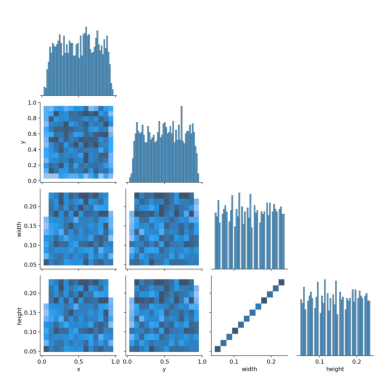

Opening image file: labels.jpg


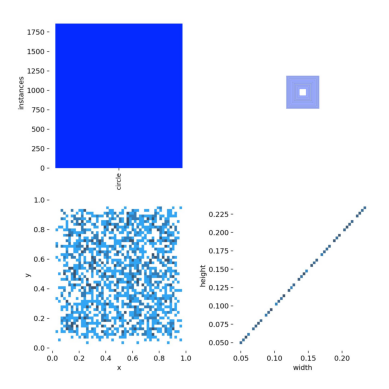

Opening image file: train_batch0.jpg


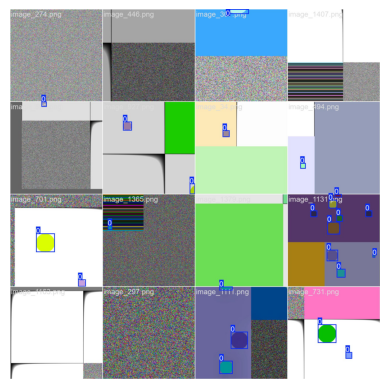

Opening image file: train_batch1.jpg


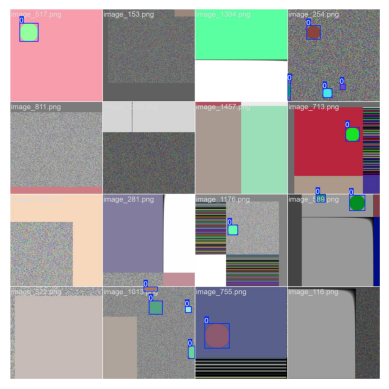

Opening image file: train_batch2.jpg


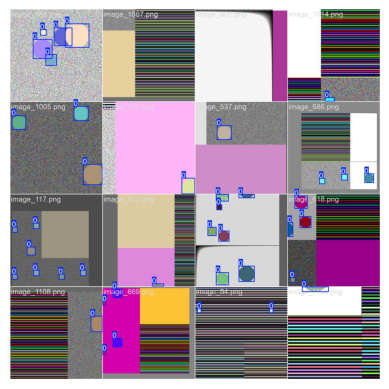

Opening CSV file: results.csv
                     epoch           train/box_loss           train/cls_loss  \
0                        1                  3.52130                  4.51510   
1                        2                  2.40320                  3.15360   
2                        3                  1.41110                  1.60030   
3                        4                  1.07160                  1.04630   
4                        5                  0.87148                  0.80893   

            train/dfl_loss     metrics/precision(B)        metrics/recall(B)  \
0                   4.0382                  0.00067                  0.12876   
1                   2.6711                  0.38183                  0.42489   
2                   1.7425                  0.96782                  0.90359   
3                   1.3839                  0.99111                  0.96137   
4                   1.2295                  0.99229                  0.95279   

        

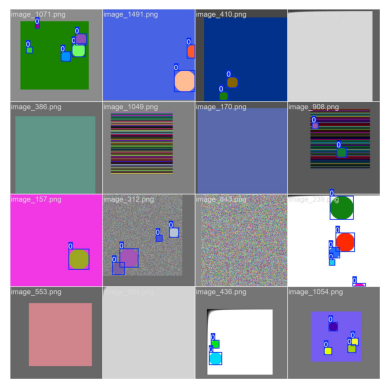

Opening image file: train_batch751.jpg


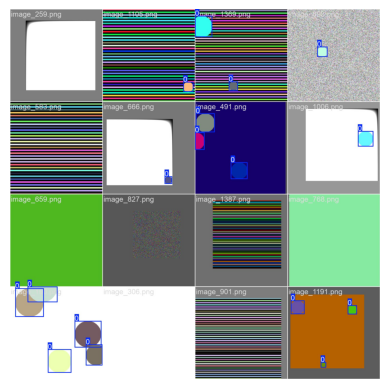

Opening image file: train_batch752.jpg


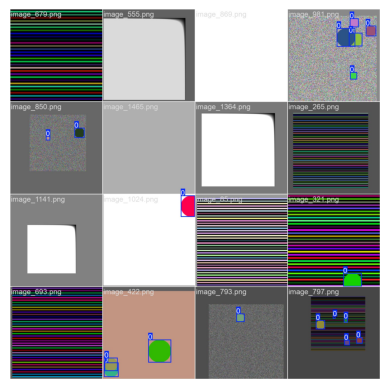

Opening image file: val_batch0_labels.jpg


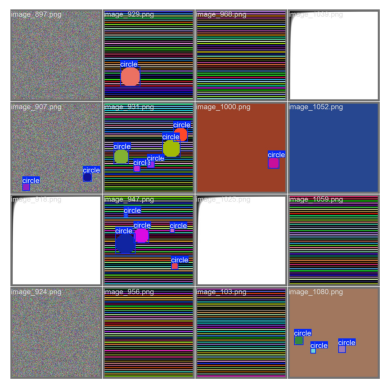

Opening image file: val_batch0_pred.jpg


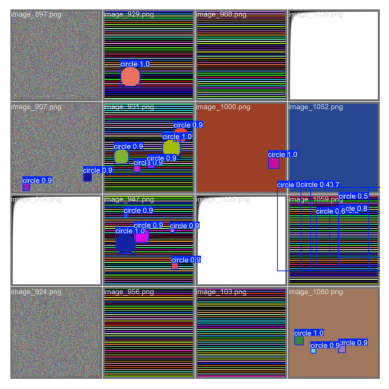

Opening image file: val_batch1_pred.jpg


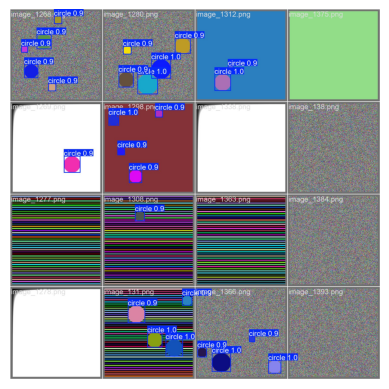

Opening image file: val_batch1_labels.jpg


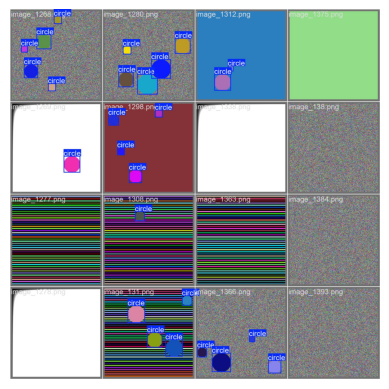

Opening image file: val_batch2_pred.jpg


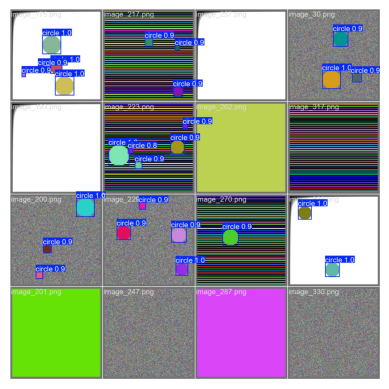

Opening image file: val_batch2_labels.jpg


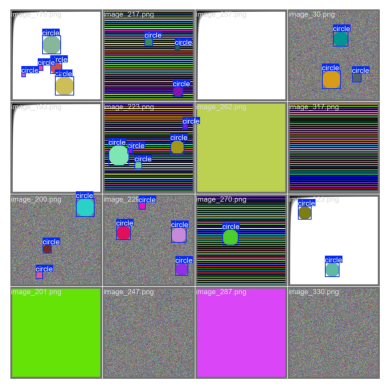

Opening image file: PR_curve.png


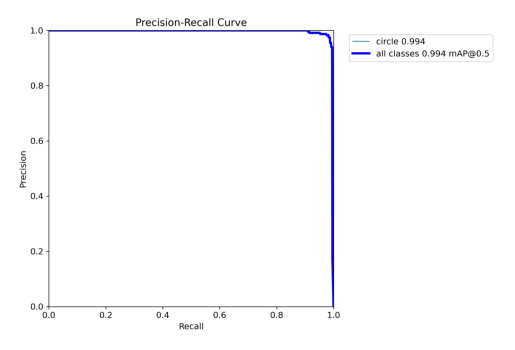

Opening image file: F1_curve.png


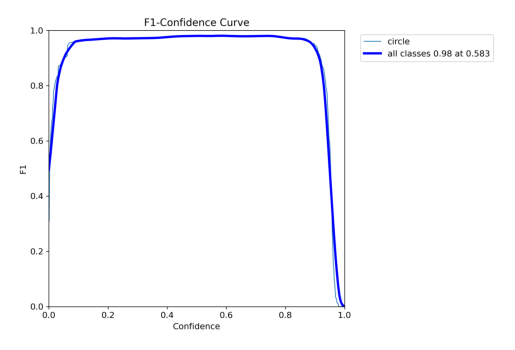

Opening image file: P_curve.png


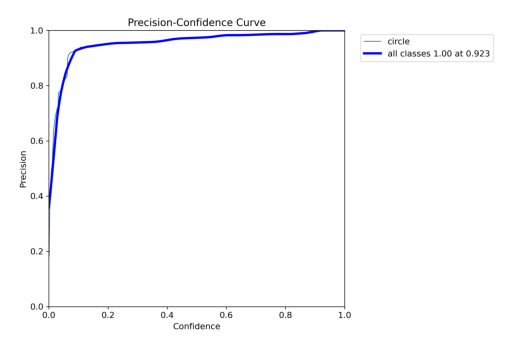

Opening image file: R_curve.png


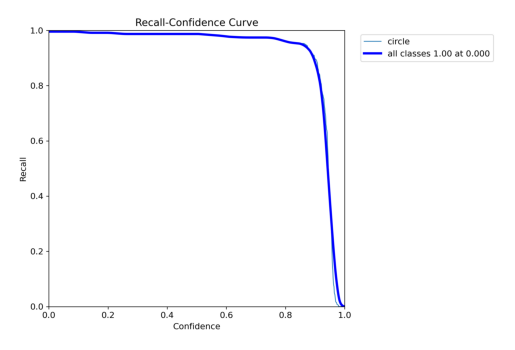

Opening image file: confusion_matrix_normalized.png


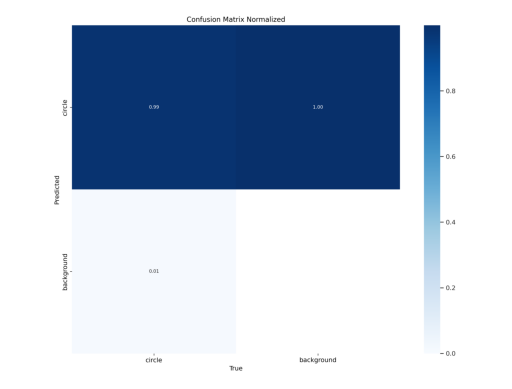

Opening image file: confusion_matrix.png


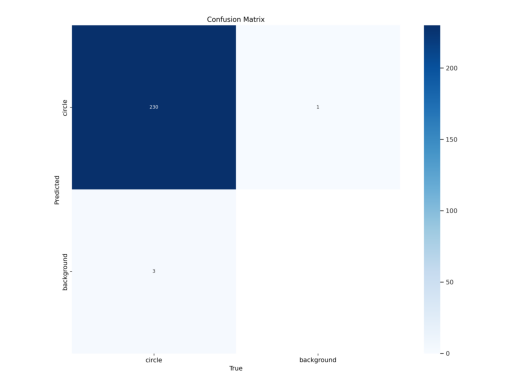

Opening image file: results.png


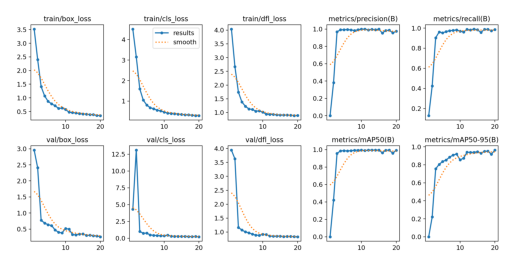

In [ ]:
# Open all files in the directory
for file in files:
    file_path = os.path.join(path, file)
    if file.endswith('.png') or file.endswith('.jpg'):
        print(f"Opening image file: {file}")
        open_image(file_path)
    elif file.endswith('.csv'):
        print(f"Opening CSV file: {file}")
        open_csv(file_path)
    elif file.endswith('.yaml'):
        print(f"Opening YAML file: {file}")
        open_yaml(file_path)
    else:
        print(f"File type not supported: {file}")

#Testing

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
from ultralytics import YOLO  # Ensure you're using the correct import for YOLOv8

In [ ]:
model = YOLO("/content/drive/MyDrive/circle_dataset/yolov8_circles/weights/best.pt") #lode the file which i have submited in the doccument


0: 640x640 4 circles, 8.8ms
Speed: 2.6ms preprocess, 8.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


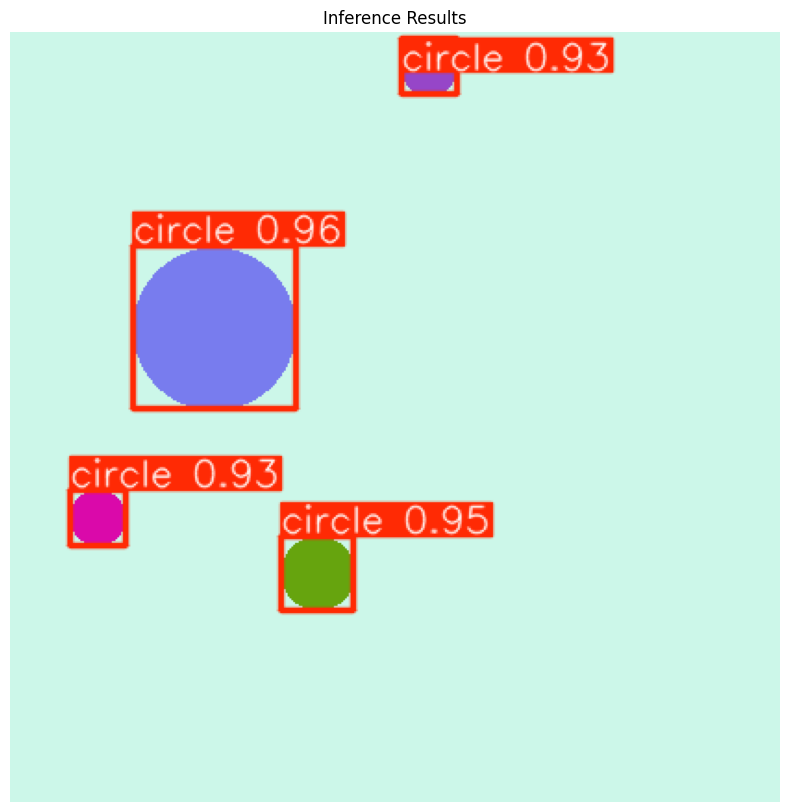

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
from ultralytics import YOLO  # Ensure you're using the correct import for YOLOv8

# Load and infer on an image
img_path = '/content/drive/MyDrive/circle_dataset/splits/val/images/image_110.png'
img = Image.open(img_path)
results = model(img)

# Check if results is not empty and contains the expected attribute for rendering
if results and hasattr(results[0], 'plot'):
    result_image = results[0].plot()  # Render the first image using .plot()
    # Display results
    plt.figure(figsize=(10, 10))
    plt.imshow(result_image)
    plt.title('Inference Results')
    plt.axis('off')
    plt.show()
else:
    print("No results or rendering method not found.")
    # Further debugging:
    print("Results:", results)
    print("Available attributes:", dir(results[0]))